In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from qsense.io import IO

In [2]:
io = IO(folder=r"2022-12-08_qfi-batch-optimization_dDD9")

In [3]:
df = io.load_dataframe(filename="qfi-batch")
df

09/12/2022, 13:45:38 | Loaded from C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\qsense\data\2022-12-08_qfi-batch-optimization_dDD9\qfi-batch.pkl successfully.


,n,d,n_layers,lr,n_steps,losses
0,2,2,1,0.2,100,"[1.3783841, 2.2890174, 2.8898308, 3.2610576, 3..."
1,2,2,2,0.2,100,"[0.028340006, 0.27342114, 0.7568312, 1.3359133..."
2,2,2,4,0.2,100,"[0.12377129, 0.52280664, 1.0760695, 1.6590111,..."
3,2,3,1,0.2,100,"[2.5572288, 5.937492, 7.3810287, 10.1863575, 1..."
4,2,3,2,0.2,100,"[2.58896, 6.264365, 9.131707, 10.749953, 12.92..."
5,2,3,4,0.2,100,"[4.0204487, 3.6716652, 6.88702, 11.461784, 13...."
6,2,4,1,0.2,100,"[8.452578, 7.973688, 9.037287, 9.063346, 9.124..."
7,2,4,2,0.2,100,"[7.055054, 9.03624, 9.228367, 10.450238, 14.80..."
8,2,4,4,0.2,100,"[7.8085933, 8.691401, 9.249571, 9.860721, 12.6..."
9,4,2,1,0.2,100,"[4.0406566, 6.64648, 8.189798, 8.804177, 9.252..."


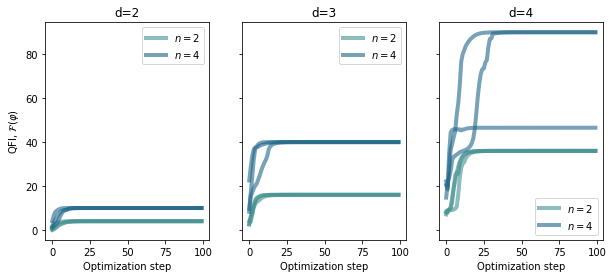

In [9]:
fig, axs = plt.subplots(1, 3, figsize=[10, 4], sharey=True)
colors = sns.color_palette("crest")
for (i, d) in enumerate(df.d.unique()):
    for n in df.n.unique():
        dfi = df[(df.d == d) & (df.n == n)]
        # print(d, n, dfi)
        for j, losses in enumerate(dfi.losses):
            axs[i].plot(losses, label=f"$n={n}$" if j == 0 else None, **dict(color=colors[n], ls='-', lw=4, alpha=0.6, ))
    # axs[i].suptitle(f"d={d}")
    axs[i].legend()
    axs[i].set(xlabel="Optimization step", title=f"d={d}")
    axs[0].set(ylabel=r'QFI, $\mathcal{F}(\varphi)$')
plt.show()

In [10]:
io.save_figure(fig, filename="qfi_learning_qudits")

09/12/2022, 13:52:38 | Saved figure to C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\qsense\data\2022-12-08_qfi-batch-optimization_dDD9\qfi_learning_qudits successfully.


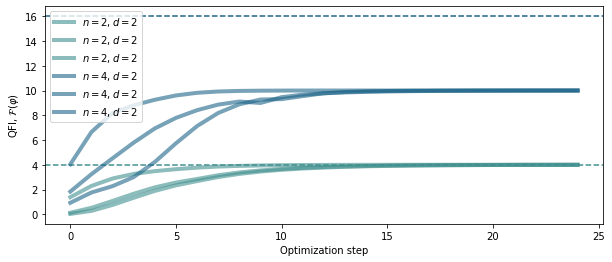

In [12]:
fig, axs = plt.subplots(1, 1, figsize=[10, 4], sharey=True)
colors = sns.color_palette("crest")
d = 2
for n in df.n.unique():
    dfi = df[(df.d == d) & (df.n == n)]
    for losses in dfi.losses:
        axs.plot(losses[:25], label=f"$n={n}, d={d}$", **dict(color=colors[n], ls='-', lw=4, alpha=0.6, ))
    axs.axhline(n**2, **dict(color=colors[n], ls="--"))

axs.legend()
axs.set(xlabel="Optimization step")
axs.set(ylabel=r'QFI, $\mathcal{F}(\varphi)$')
plt.show()

In [11]:
io = IO(folder=r"2022-12-09_qfi-batch-optimization_57f8")
df = io.load_dataframe(filename="qfi-batch")
df

09/12/2022, 14:23:58 | Loaded from C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\qsense\data\2022-12-09_qfi-batch-optimization_57f8\qfi-batch.pkl successfully.


,n,d,n_layers,lr,n_steps,losses,qfi
0,2,2,1,0.2,50,"[0.47449005, 1.0733958, 1.5918473, 1.9967922, ...",4.0
1,4,2,1,0.2,50,"[4.169504, 6.0323515, 7.603778, 8.790512, 9.68...",15.922148
2,6,2,1,0.2,50,"[3.512764, 4.0202208, 4.3082485, 4.4767118, 4....",35.991196
3,8,2,1,0.2,50,"[12.594271, 18.890415, 24.623775, 29.858381, 3...",63.93453


QFI saturating to GHZ/N00N states

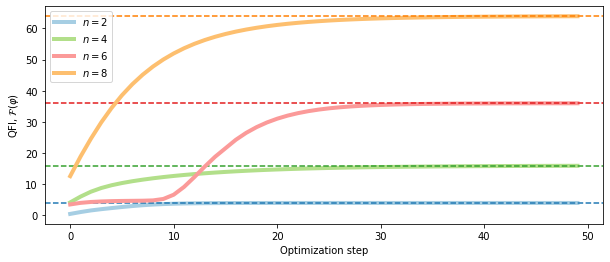

09/12/2022, 14:26:03 | Saved figure to C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\qsense\data\2022-12-09_qfi-batch-optimization_57f8\qubit_qfi_plateau successfully.


In [17]:
fig, axs = plt.subplots(1, 1, figsize=[10, 4])
colors = sns.color_palette("Paired")
d = 2
for i, n in enumerate(df.n.unique()):
    dfi = df[(df.d == d) & (df.n == n)]
    for losses in dfi.losses:
        axs.plot(losses, label=f"$n={n}$", **dict(color=colors[2*i], ls='-', lw=4, alpha=1.0, ))
    axs.axhline(n**2, **dict(color=colors[2*i + 1], ls="--"))

axs.legend()
axs.set(xlabel="Optimization step")
axs.set(ylabel=r'QFI, $\mathcal{F}(\varphi)$')
plt.show()

io.save_figure(fig, filename="qubit_qfi_plateau")